In [936]:
# 라이브러리 설치
# !pip install matplotlib

In [937]:
import pandas as pd
import numpy as np
# 현재 컴퓨터의 os를 확인하기 위한 라이브러리
import platform
import matplotlib.pyplot as plt

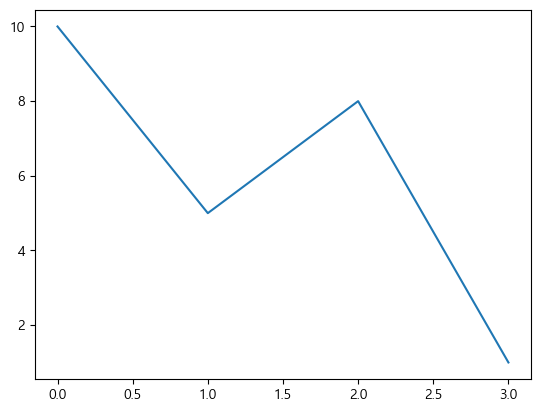

In [938]:
# 라인 그래프를 생성
# case1 : y축에 데이터만 존재하는 경우
y = [10, 5, 8, 1]
# 라인 그래프를 그려주는 함수 : plot()
plt.plot(y)

plt.show()

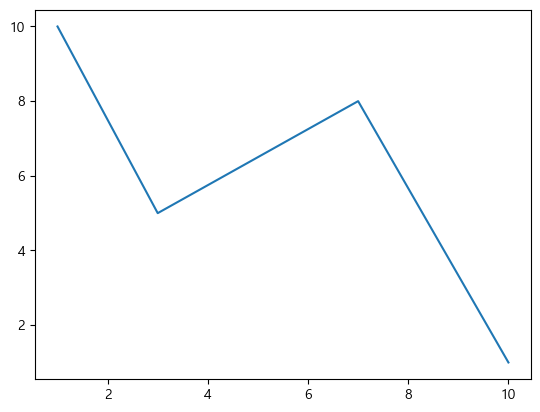

In [939]:
# case2 : x축의 데이터와 y축의 데이터가 모두 존재할 때
x = [1, 3, 7, 10]
y = [10, 5, 8, 1]

plt.plot(x,y)

plt.show()

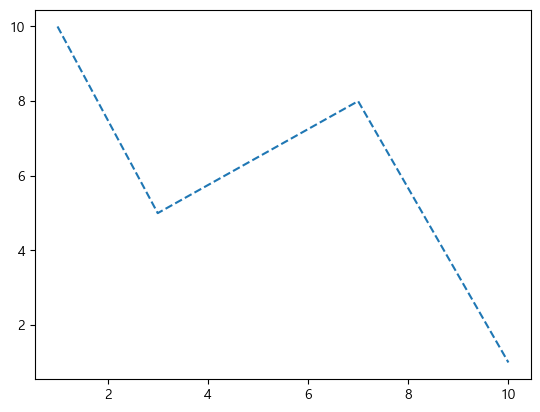

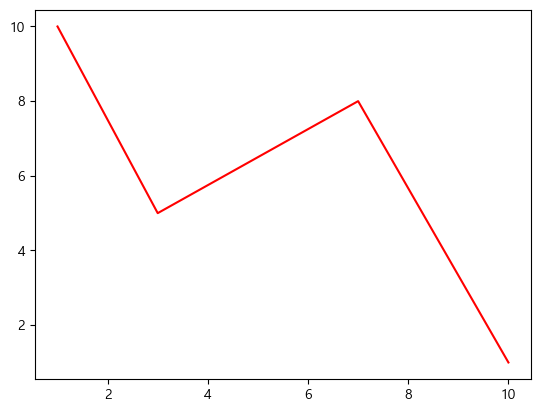

In [940]:
# 선의 종류와 색을 변경
plt.plot(x, y,
        '--')
plt.show()
plt.plot(x, y,
        'r')
plt.show()

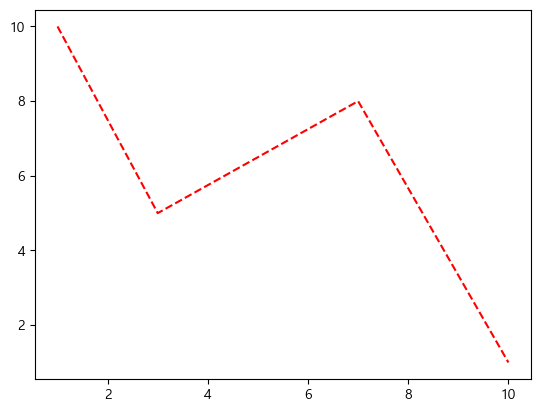

In [941]:
plt.plot(x, y,
        'r--')
plt.show()

In [942]:
# matplot에서 한글 깨짐 방지를 위해서 기본 설정 폰트를 변경
# 사용하고 있는 컴퓨터의 os가 MAC인 경우 
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')


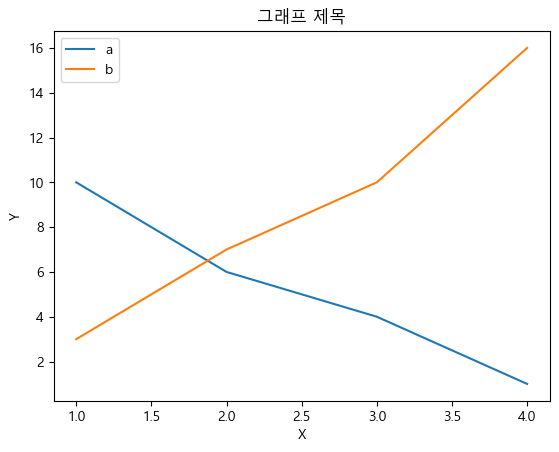

In [943]:
# 하나의 공간의 2개의 라인 그래프를 생성
x = [1, 2, 3, 4]
y1 = [10, 6, 4 ,1]
y2 = [3, 7, 10, 16]

plt.plot(x, y1)
plt.plot(x, y2)

# x축의 라벨링
plt.xlabel('X')
# y축의 라베링
plt.ylabel('Y')
# 그래프의 제목
plt.title("그래프 제목")
# 그래프별 범례
plt.legend(['a', 'b'])

plt.show()

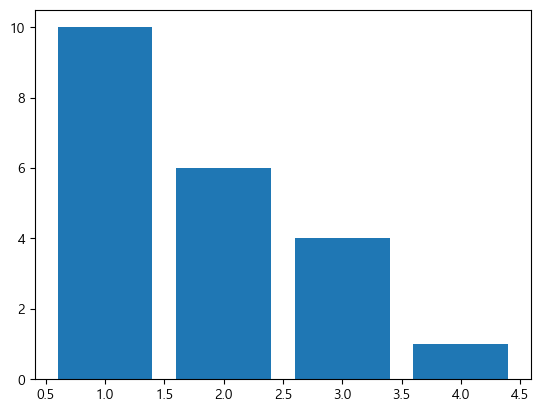

In [944]:
# 수직 막대 그래프
plt.bar(x, y1)
plt.show()

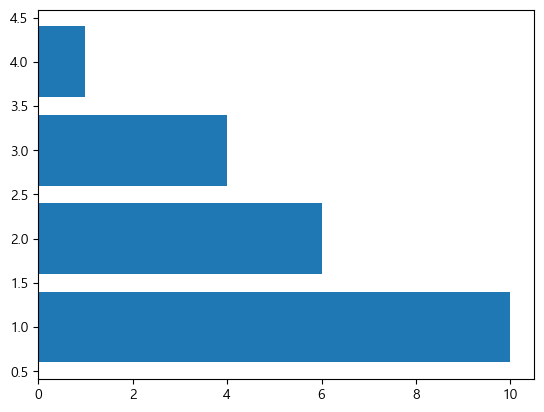

In [945]:
# 수평 막대 그래프
plt.barh(x, y1)
plt.show()

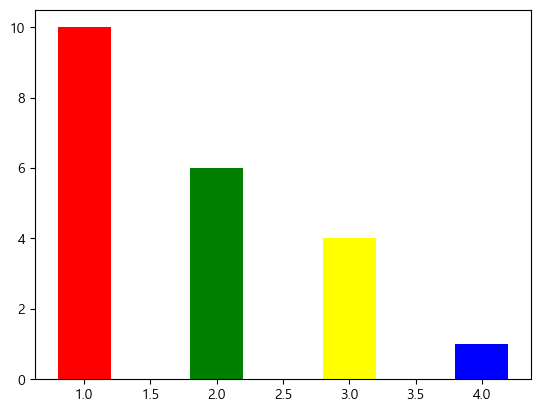

In [946]:
plt.bar(x, y1,
        width = 0.4,
        color = ['red', 'green', 'yellow', 'blue'])
plt.show()

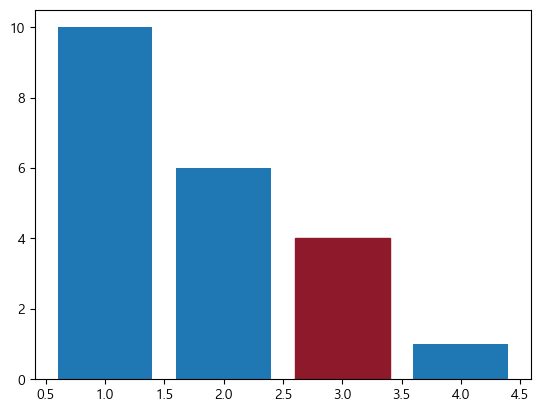

In [947]:
# 막대 그래프에서 특정 막대의 설정을 변경
bar_graph = plt.bar(x, y1)
#bar_graph의 3번째 막대(index2)를 선택하여 색상을 변경
bar_graph[2].set_color('#8d192b')

plt.show()

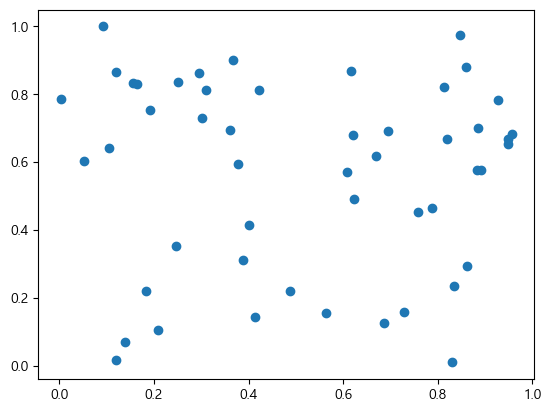

In [948]:
# 산점도 그래프
x = np.random.random(50)
y = np.random.random(50)

plt.scatter(x, y)

plt.show()

In [949]:
# drinks.csv 데이터 파일 로드
df = pd.read_csv("./../csv/drinks.csv")

In [950]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [951]:
# 피어슨 상관 계스
df.iloc[ : ,1 : -1].corr('pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


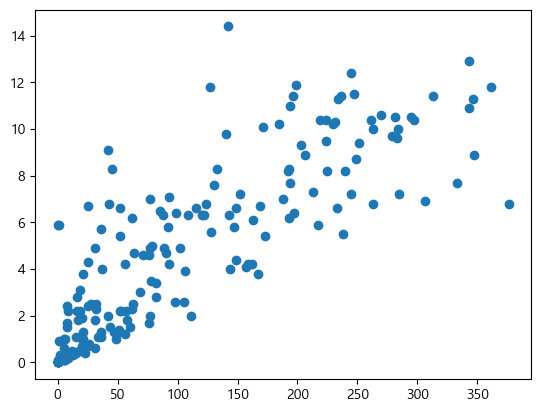

In [952]:
# df에서 맥주 소비량과 순수알콜량의 상관계수가 0.8이상이다.
# 산점도 확인
x = df['beer_servings']
y = df['total_litres_of_pure_alcohol']

plt.scatter(x, y)

plt.show()

1. csv 폴더 안에 있는 drinks.csv. 파일 로드
2. 데이터프레임의 정보를 확인하고 결측치의 존재를 파악
3. 컬럼의 이름을 변경 -> [국가, 맥주소비량, 증류주소비량, 와인소비량, 순수알콜량, 대륙]
4. 결측치의 대륙 컬럼에 존재 -> 결측치는 'OT' 대체
5. 파생변수 '총술소비량' -> 맥주소비량 + 증류주소비량 + 와인소비량
6. 파생변수 '도수' -> (순수 알콜량 / 총술소비량) * 100
7. 대륙별 그룹화를 하고 도수의 평균을 구한다. -> 가장 독한 술을 먹는 대륙은 어딘가를 확인


In [953]:
# 데이터프레임의 정보를 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [954]:
# country 컬럼의 데이터가 고유실별자(primary key) 인가?
df['country'].nunique()

193

In [955]:
df['country'].value_counts()

country
Afghanistan    1
Albania        1
Algeria        1
Andorra        1
Angola         1
              ..
Venezuela      1
Vietnam        1
Yemen          1
Zambia         1
Zimbabwe       1
Name: count, Length: 193, dtype: int64

In [956]:
# 결측치의 개수를 확인
# 결측치의 존재 유무 -> bool를 합산
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [957]:
# 기본 통계량 정보
df['continent'].describe()

count     170
unique      5
top        AF
freq       53
Name: continent, dtype: object

In [958]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [959]:
# 컬럼의 이름을 변경
#c ase1 : rename() -> 기준의 이름을 재지정 -> 인덱스와 컬럼의 이름을 변경
df.rename(
    columns = {
        'country' : '국가',
        'beer_servings' : '맥주소비량',
        'spirit_servings' : '증류주소비량',
        'wine_servings' : '와인소비량',
        'total_litres_of_pure_alcohol' : '순수알콜량',
        'continent' : '대륙'
    }
)

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [960]:
# case2 : 데이터프레임 안에 변수 columns 데이터를 대입
# 유의 사항 -> 기존 columns의 개수와 대입하는 데이터의 개수가 같아야한다.
df.columns = ['국가', '맥주소비량', '증류주소비량', '와인소비량', '순수알콜량', '대륙']
df

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [961]:
# 대륙 컬럼의 결측치를 다른 특정 데이터로 대체(교체//채워준다)
df['대륙'].replace(np.nan, 'OT', inplace= True)

C:\Users\abohv\AppData\Local\Temp\ipykernel_2828\13797587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['대륙'].replace(np.nan, 'OT', inplace= True)


In [962]:
# df['대륙'] = df['대륙'].fillna('OT')

In [963]:
df.isna().sum()

국가        0
맥주소비량     0
증류주소비량    0
와인소비량     0
순수알콜량     0
대륙        0
dtype: int64

In [964]:
# 파생뱐수 생성
df['맥주소비량'] + df['와인소비량'] + df['증류주소비량']

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Length: 193, dtype: int64

In [965]:
df['총술소비량'] = df.loc[:,'맥주소비량':'와인소비량'].sum(axis=1)

In [966]:
# 도수 컬럼을 생성
# (순수알콜량 / 총술소비량) * 100
df['도수'] = (df['순수알콜량'] / df['총술소비량'] * 100).fillna(0)

In [967]:
# 대륙을 기준으로 그룹화
# case1 : groupby() 함수를 아용하고 그룹화 연산
    # groupby(그룹화를 할 컬럼을 입력)
df.groupby(['대륙'])[['도수']].mean()   # -> [[]] : 가변

,도수
대륙,
AF,4.974072
AS,1.635903
EU,1.752705
OC,1.689543
OT,1.785407
SA,1.786790


In [968]:
df[['도수', '대륙']].groupby(['대륙']).mean()

,도수
대륙,
AF,4.974072
AS,1.635903
EU,1.752705
OC,1.689543
OT,1.785407
SA,1.786790


<Axes: xlabel='대륙'>

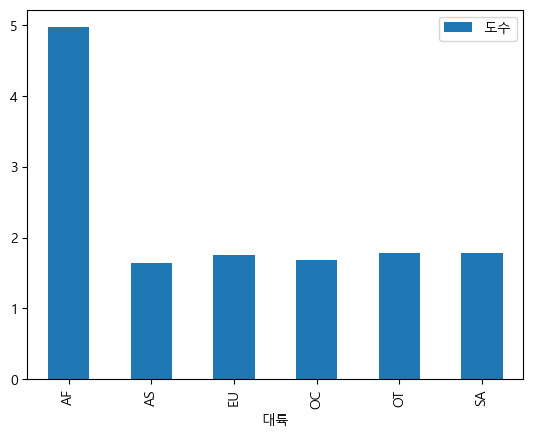

In [969]:
# case2 : pivot_table() 함수를 이용
# pivot_table은 데이터프레임 안에도 존재, pandas에서도 존재
df.pivot_table(
    index = '대륙',
    values = '도수',
    aggfunc = 'mean'
).plot.bar()

#### 연습
- 총술소비량을 기준으로 우리나라는 몇위인가?
    1. 총술소비량을 기준으로 내림차순 정렬
    2. 과연 우리나라가 몇번째 행에 존재하는가?
        - 인덱스를 초기화하고 기존의 인덱스는 제거
        - 국가가 South Korea인 데이터의 인덱스를 추출하여 +1을 해서 순위를 출력한다.

In [970]:
df1 = df.sort_values(['총술소비량'],ascending=False)

In [971]:
df1.reset_index(drop=True, inplace=True)

In [972]:
df1

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙,총술소비량,도수
0,Andorra,245,138,312,12.4,EU,695,1.784173
1,Czech Republic,361,170,134,11.8,EU,665,1.774436
2,Grenada,199,438,28,11.9,OT,665,1.789474
3,France,127,151,370,11.8,EU,648,1.820988
4,Russian Federation,247,326,73,11.5,AS,646,1.780186
...,...,...,...,...,...,...,...,...
188,Libya,0,0,0,0.0,AF,0,0.000000
189,Maldives,0,0,0,0.0,AS,0,0.000000
190,Monaco,0,0,0,0.0,EU,0,0.000000
191,Somalia,0,0,0,0.0,AF,0,0.000000


In [973]:
flag = df1['국가'] == 'South Korea'

In [974]:
df1.loc[flag,].index[0] + 1

np.int64(99)

In [975]:
df = df1

- 국가별 총술소비량 데이터를 막대그래프로 생성
- x축은 국가, y축 총술소비량

Text(109, 256, 'South Korea \n rank : 100 \n value : 156')

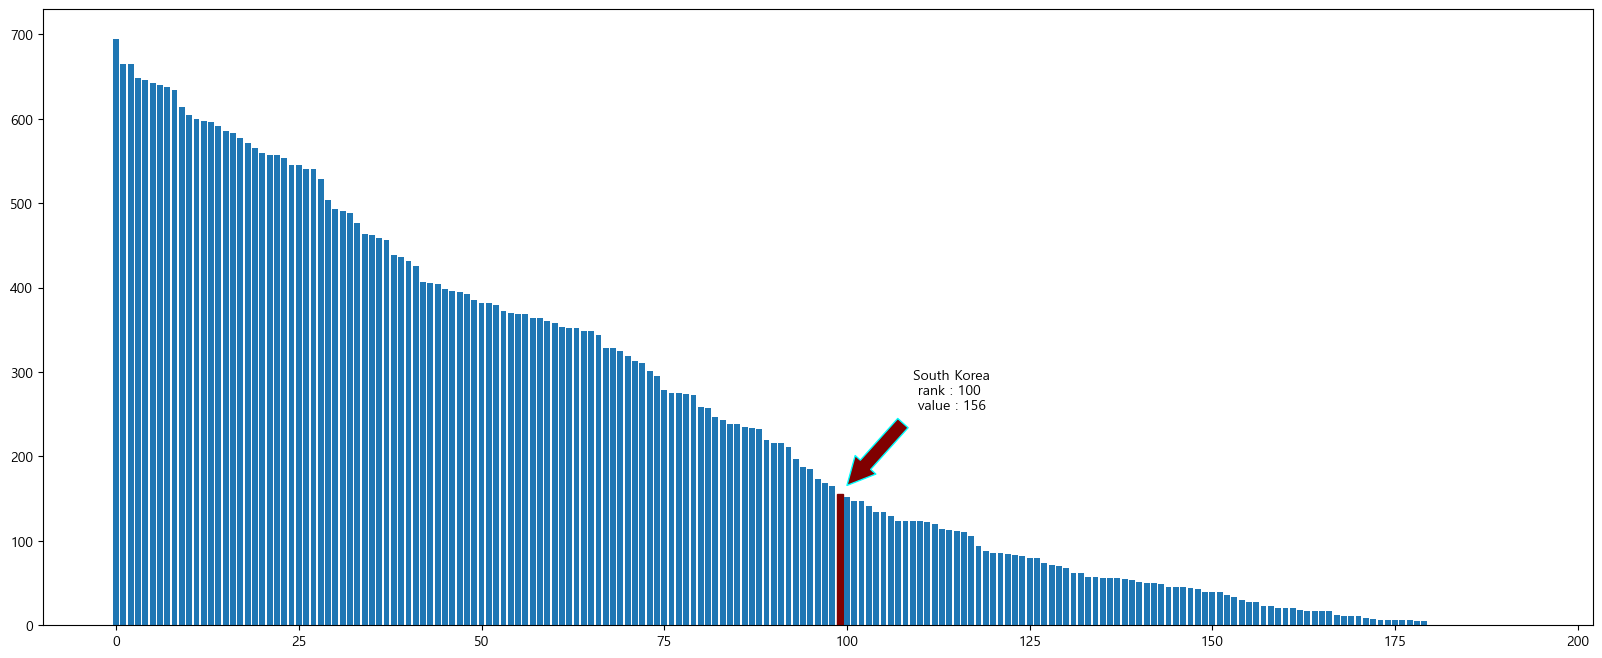

In [976]:
x = df.index
y = df['총술소비량']

# 한국의 인덱스 번호를 저장
flag = df['국가'] == 'South Korea'
korea_index = df.loc[flag,].index[0] + 1
korea_value = df.loc[korea_index, '총술소비량']

# 그래프가 그려지는 공간의 사이즈를 변경
plt.figure(figsize=(20, 8))


bar_list = plt.bar(x, y)

# korea_index 위치에 막대의 색상을 변경
bar_list[korea_index].set_color('#800000')

# 주석을 추가
plt.annotate(
    # 주석 문구
    f"South Korea \n rank : {korea_index + 1} \n value : {korea_value}",
    # 주석 위치 (설명이 되야되는 부분)
    xy = (korea_index, korea_value),
    xytext = (korea_index + 10, korea_value + 100),
    # xy, xy_text를 연결하는 화살표 추기
    arrowprops = {
        'facecolor' : '#800000', # 화살표 내부의 색상을 설정
        'edgecolor' : 'cyan', # 화살표 테두리의 색상을 설정
        'headwidth' : 20, # 화살표 머리의 너비 설정
        'headlength' : 20, #화살표 머리의 길이
        'width' : 10, # 화살표 꼬리의 너비
        'shrink' : 0.1 # 화살표와 xy,xytext의 간격을 설정        
    }
)


- 도수 컬럼을 기준으로 한국은 몇위인가?
    1. 도수 컬럼을 기준으로 내림차순 정렬
    2. 인덱스를 초기화하고 기존의 인덱스는 제거
    3. 국가가 South Korea인 인덱스를 추출하여 korea_idx에 대입
    4. 국가가 South Korea인 데이터에서 도수의 value를 korea_value에 대입
    5. 전체 데이터프레임에서 index와 도수 컬럼을 기준으로 하여 막대 그래프 생성
    6. korea_idx 위치의 막대의 색상을 빨간색으로 변경하고 주석을 설정

In [977]:
df2 = df.sort_values(['도수'], ascending=False)

In [978]:
df2.reset_index(drop=True, inplace=True)

In [979]:
korea_idx = df2.loc[df2['국가'] == 'South Korea',].index[0]
korea_value = df2.loc[korea_idx, '도수']

In [980]:
korea_value = round(korea_value, 2)

Text(24, 10.940000000000001, 'South Korea \n rank : 15 \n value : 5.94')

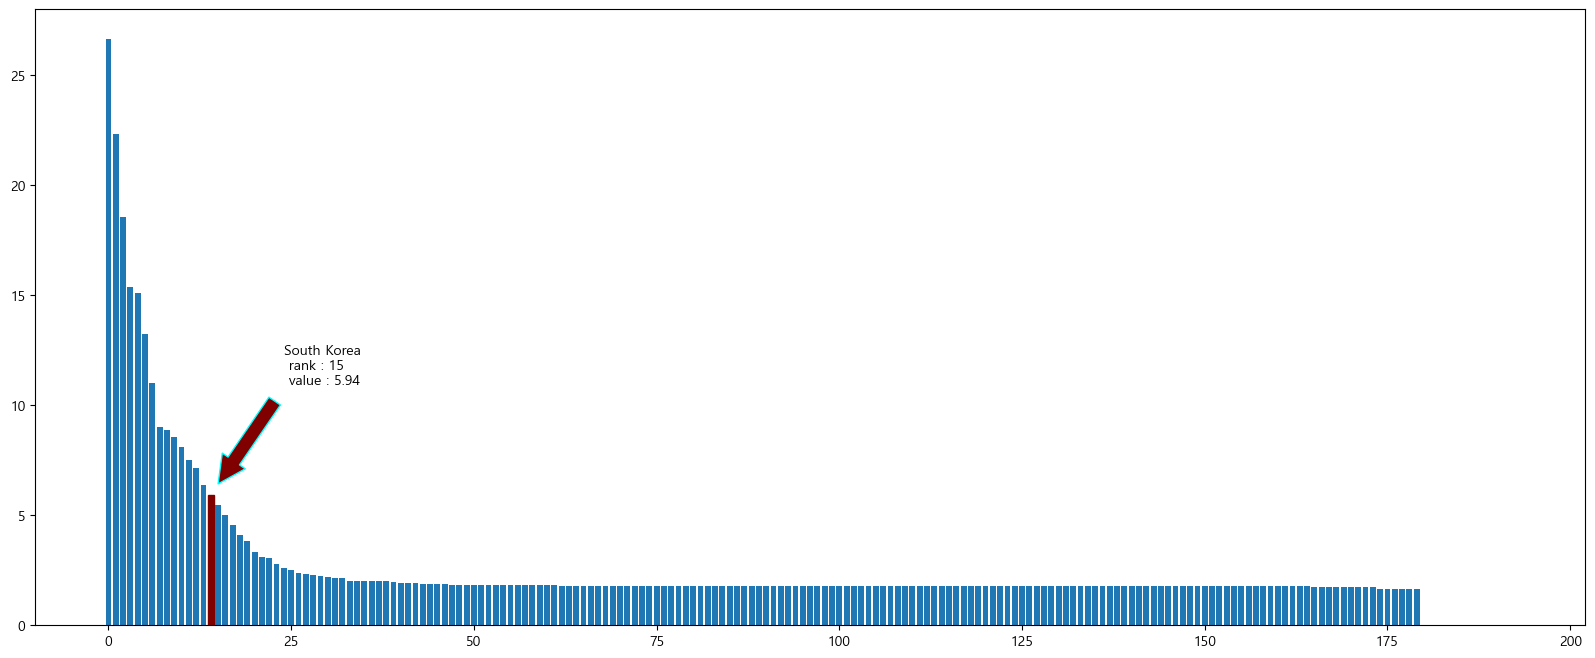

In [981]:
x = df2.index
y = df2['도수']

# 그래프가 그려지는 공간의 사이즈를 변경
plt.figure(figsize=(20, 8))

bar_list2 = plt.bar(x, y)

# korea_index 위치에 막대의 색상을 변경
bar_list2[korea_idx].set_color('#800000')

# 주석을 추가
plt.annotate(
    # 주석 문구
    f"South Korea \n rank : {korea_idx + 1} \n value : {korea_value}",
    # 주석 위치 (설명이 되야되는 부분)
    xy = (korea_idx, korea_value),
    xytext = (korea_idx + 10, korea_value + 5),
    # xy, xy_text를 연결하는 화살표 추기
    arrowprops = {
        'facecolor' : '#800000', # 화살표 내부의 색상을 설정
        'edgecolor' : 'cyan', # 화살표 테두리의 색상을 설정
        'headwidth' : 20, # 화살표 머리의 너비 설정
        'headlength' : 20, #화살표 머리의 길이
        'width' : 10, # 화살표 꼬리의 너비
        'shrink' : 0.1 # 화살표와 xy,xytext의 간격을 설정        
    }
)